# Mergesort

In diesem Notebook schauen wir uns Mergesort an und vergleichen diesen mit einem naiven Sortieralgorithmus, nämlich Insertionsort.

### Insertionsort

Der folgende Algorithmus entspricht der klassischen Variante von Insertionsort.

In [1]:
def insertion_sort(array):
      n = len(array)
      for i in range(1, n):  # i = 1, ..., n - 1
          # move array[i] to the left unxtil it is
          # at the correct position.
          for j in range(i, 0, -1):  # j = i, ..., 1
              if array[j] < array[j-1]:
                  # not yet at final position.
                  # swap array[j] and array[j-1]
                  array[j], array[j-1] = array[j-1], array[j]
              else:
                  break  # continue with next i

#### Laufzeit

Im Folgenden messen wir die Laufzeit vom Algorithmus für zufällige Arrays der Grösse 10, 100, 1000 und 10000. 

In [2]:
import timeit
import random

In [3]:
def createRandArray(n):
    a = [0]*n
    for i in range(0, n):
        a[i] = random.randint(0, n)
    return a

In [4]:
for i in range (1, 5):
    a = createRandArray(10**i)
    t = timeit.timeit(lambda: insertion_sort(a), number=1)
    print("insertion sort auf " +str(10**i) + " Elementen: " + str(t))

insertion sort auf 10 Elementen: 2.1333000404410996e-05
insertion sort auf 100 Elementen: 0.0013005139999222592
insertion sort auf 1000 Elementen: 0.46440303300005326
insertion sort auf 10000 Elementen: 37.36733173399989


Wir sehen hier die typische quadratische Laufzeit. Wenn wir 10 mal mehr Elemente sortieren brauchen wir ca. 100 mal länger. 

### Merge Sort

Der Kern der Merge-Sort-Algorithmus ist die Mergefunktion, die zwei benachbarte bereits sortierte Bereiche einer Sequenz zusammenführt.

Der erste Bereich geht dabei von Position `lo` bis einschliesslich Position `mid`, der zweite Bereich von Position `mid+1` bis einschliesslich Position `hi`. Array `tmp` dient als "Zwischenspeicher" und muss die gleiche Länge wie `array` haben.

In [9]:
def merge(array, tmp, lo, mid, hi):
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):  # k = lo,...,hi
        if j > hi or (i <= mid and array[i] <= array[j]):
            tmp[k] = array[i]
            i += 1
        else:
            tmp[k] = array[j]
            j += 1
    for k in range(lo, hi + 1):  # k = lo,...,hi
        array[k] = tmp[k]

In [10]:
array = [8, 7, 3, 5, 7, 2, 5, 6, 2, 8]
tmp = [0] * len(array)
merge(array, tmp, 2, 4, 7)
print(array)

[8, 7, 2, 3, 5, 5, 6, 7, 2, 8]


Die Top-Down-Variante von Mergesort teilt den sortierenden Bereich in zwei etwa gleich grosse Teilbereiche auf, sortiert sie jeweils mit einem rekursiven Aufruf und führt die dann sortierten Teilbereiche wieder mit `merge` zusammen.

In [11]:
def mergesort(array):
    tmp = [0] * len(array)  # [0,...,0] with same size as array
    sort_aux(array, tmp, 0, len(array) - 1)

def sort_aux(array, tmp, lo, hi):
    # print("start sorting positions", lo, "to", hi)
    if hi <= lo:
        return
    mid = lo + (hi - lo) // 2
    # //: Division mit Abrunden
    sort_aux(array, tmp, lo, mid)
    sort_aux(array, tmp, mid + 1, hi)
    merge(array, tmp, lo, mid, hi)
    # print("merged", lo, "-", mid, "and", mid+1, "-", hi)

In [12]:
array = [4, 2, 5, 7, 9, 6, 4, 1]
mergesort(array)
print(array)

[1, 2, 4, 4, 5, 6, 7, 9]


Die Bottom-Up-Variante von Mergesort arbeitet iterativ und sortiert erst alle hintereinanderliegenden Teilbereiche der Grösse 2, dann der Grösse 4, dann 8, etc.

In [ ]:
def bottom_up_mergesort(array):
    n = len(array)
    tmp = [0] * n
    length = 1
    while length < n:
        lo = 0
        while lo < n - length:
            mid = lo + length - 1
            hi = min(lo + 2 * length - 1, n - 1)
            merge(array, tmp, lo, mid, hi)
            # print("merged", lo, "-", mid, "and", mid+1, "-", hi)
            lo += 2 * length
        length *= 2

In [ ]:
array = [4, 2, 5, 7, 9, 6, 4, 1, 5]
bottom_up_mergesort(array)
print(array)

### Laufzeit Mergesort

Auch hier wollen wir nun die Laufzeit vergleichen. 

In [13]:
import timeit
import random

In [14]:
def createRandArray(n):
    a = [0]*n
    for i in range(0, n):
        a[i] = random.randint(0, n)
    return a

In [15]:
for i in range (1, 7):
    a = createRandArray(10**i)
    t = timeit.timeit(lambda: mergesort(a), number=1)
    print("mergesort auf " +str(10**i) + " Elementen: " + str(t))

mergesort auf 10 Elementen: 4.594899974108557e-05
mergesort auf 100 Elementen: 0.0002986670001519087
mergesort auf 1000 Elementen: 0.0074445220002417045
mergesort auf 10000 Elementen: 0.12383974300018963
mergesort auf 100000 Elementen: 1.4160505630002262
mergesort auf 1000000 Elementen: 16.786702505999983


Im Gegensatz zu Insertionsort sehen wir nun ein sehr viel besseres Laufzeitverhalten. Die Laufzeit steigt nur leicht überlinear. Im Gegensatz zu insertionsort können wir somit auch sehr grosse Sequenzen effizient sortieren. 

### Mergesort - Visualisierung

Die folgende Visualisierung wurde von Lukas Schaffner, einem Teilnehmer vom GymInf, geschrieben. Damit diese funktioniert müssen Sie das Graphviz Package installieren. Falls Sie die Annaconda Distribution verwenden, können Sie dies mit folgenden Befehlen machen:
```
conda install -c conda-forge graphviz
conda install -c conda-forge python-graphviz
```

Falls Sie google collab verwenden, installieren Sie das Paket mit folgendem Befehl:
```
!apt-get -qq install -y graphviz && pip install -q pydot
```

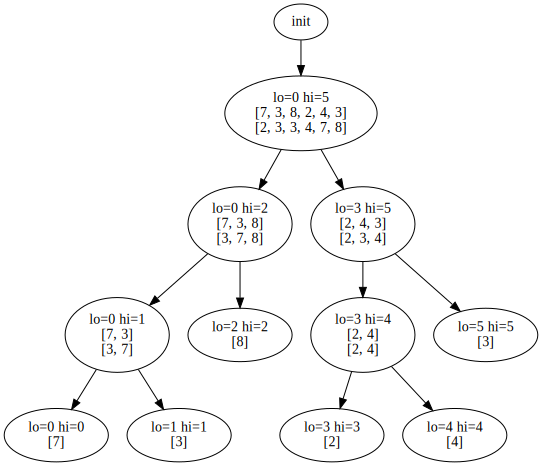

In [16]:
from graphviz import Digraph

def merge(array, tmp, lo, mid, hi):
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1): # k = lo,...,hi
        if j > hi or (i <= mid and array[i] <= array[j]):
            tmp[k] = array[i]
            i += 1
        else: # j <= hi and (i > mid or array[i] > array[j])
            tmp[k] = array[j]
            j += 1
    for k in range(lo, hi + 1): # k = lo,...,hi
        array[k] = tmp[k]

def mergeSortDrawTree(array):
    global nodeCounter,dot
    nodeCounter = 0
    dot = Digraph()
    dot.node(str(nodeCounter),"init")
   
    tmp = [0] * len(array) # [0,...,0] with same size as array
    mergeSortAuxDrawTree(array, tmp, 0, len(array) - 1, nodeCounter)
    return dot

def mergeSortAuxDrawTree(array, tmp, lo, hi, prevNodeCounter):
    global nodeCounter,dot
    nodeCounter+=1
    currentNodeCounter = nodeCounter
    unsortedList = str(array[lo:hi+1])
   
    if hi <= lo:
        dot.node(str(currentNodeCounter),"lo="+str(lo)+" hi="+str(hi)+"\n"+str(array[lo:hi+1]))
        dot.edge(str(prevNodeCounter),str(currentNodeCounter))
        return
    mid = lo + (hi - lo) // 2
    mergeSortAuxDrawTree(array, tmp, lo, mid, currentNodeCounter)
    mergeSortAuxDrawTree(array, tmp, mid + 1, hi, currentNodeCounter)
    merge(array, tmp, lo, mid, hi)
   
    dot.node(str(currentNodeCounter),"lo="+str(lo)+" hi="+str(hi)+"\n"+unsortedList+"\n"+str(array[lo:hi+1]))
    dot.edge(str(prevNodeCounter),str(currentNodeCounter))

mergeSortDrawTree([7,3,8,2,4,3])